#DHANISH AHAMMED MV
#MS21218
#ASSIGNMENT 02

#QUESTION 1 - SOLUTION

We are generating a binary classification dataset based on the parameters taken.

● If theta is within range of 0-1, an array of random numbers beta of size b+1 is made.

● A random Matrix X (a,b) and columns of ones(Array1) is also made. The arrays are linked to form a matrix x.

● A random binary array "flipper" of size "a" with a probability of being 1 of"theta."

● We calculate the predicted values of the binary target variable "yGenArray" based on the dot product of"x" and "beta".

● The predicted values are then converted to binary values by using the lambda function "ySelector," which returns 1 if the input value is greater than 0.5 and 0 otherwise.

● The binary values obtained are then reversed by XORing them with the "flipper" array. As a tuple, the function returns the "X,""Y," and "Beta" arrays.


In [ ]:
import numpy as np

def generate_dataset(theta, a, b) -> tuple:
    if (theta > 1) or (theta < 0):
        print("Error!!! Invalid theta value")

    beta = np.random.uniform(-0.99, 1, b + 1)

    Array1 = np.ones(a)
    X = np.random.uniform(-0.99, 1, size=(a, b))
    x = np.column_stack((Array1, X))
    flipper = np.random.binomial(1, theta, a)

    yGenArray = 1 / (1 + np.exp(-np.dot(X, beta)))
    ySelector = lambda t: 1 if t > 0.5 else 0

    Y = np.array(list(map(ySelector, yGenArray)))

    Y = Y ^ flipper

    return X, Y, beta


#QUESTION 2 - SOLUTION

A python function that performs logistic regression on the input data X and target variable Y is made. The function requires four inputs:-

● X: 2D numpy array (n,m)

● Y: a 1D numpy array(n)

● K:- number of iterations

● Tau:- stopping criteria for the algorithm

● Λ:- Learning rate

The parameters/weights - beta of the logistic regression model that fits the data well.

The final values of beta and cost are returned as tuples

The cost is calculated using the loss function.


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def entropy(y,Y):
  return -np.mean(Y*np.log(y)+ (1-Y)*np.log(1-y))
def Lin_regression(X,Y,k,tau,lamda):
  a,b=X.shape
  learning_rate=lamda

  cost=0
  x=np.column_stack((oneArray,X))
  oneArray=np.ones(a)
  beta =np.random.rand(b+1)
  for i in range(k):
    y=sigmoid(np.dot(x,beta))
    gradient=np.dot(X.T,y-Y)/a
    beta =learning_rate*gradient
    cost=entropy(y,Y)
    if np.linalg.norm(gradient)< tau:
       break
  return beta,cost

#QUESTION 3 - SOLUTION

IN PDF FORMAT (UPLOADED)

#QUESTION 4 - SOLUTION

Regularization is a technique used to avoid the overfitting problem. Overfitting occurs
when the learned hypothesis fits the training data so well that it degrades the model's
performance on unseen data. The model generalises poorly to new instances that are not
part of the training data.

Regularization involves the addition of information to an objective function. We use
regularisation to introduce bias into our model to prevent it from overfitting to our
training data.


Mean Squared Error: 9.526315779838926


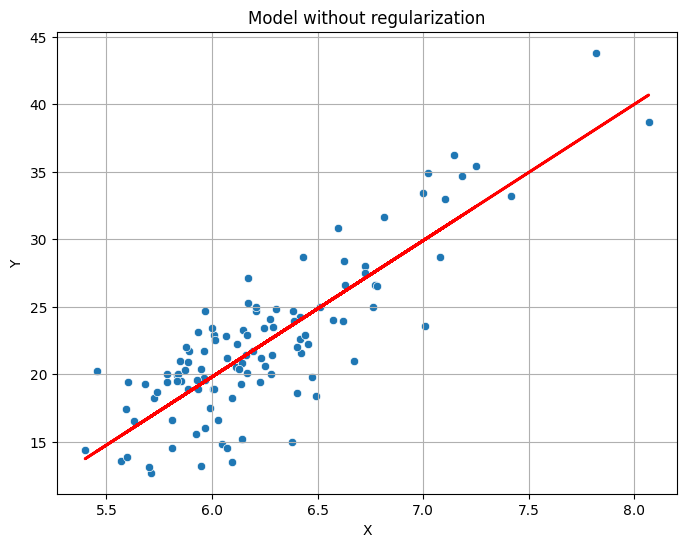

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

URL = "https://raw.githubusercontent.com/a-kir-a/Machine-learning/main/Dataset.csv"
df = pd.read_csv(URL, header=None)

x = df.loc[:110, 5].values.reshape(-1, 1)
y = df.loc[:110, 13].values.reshape(-1, 1)

# Linear Regression without regularization
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x=x.flatten(), y=y.flatten())

# Linear regression line
plt.plot(x.flatten(), y_pred.flatten(), color="red", linewidth=2)

plt.title("Model without regularization")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

L1 REGULARISATION

● L1 regularization combats overfitting by shrinking the parameters towards 0.

● Regularization is a technique for preventing the overfitting problem. Overfitting Linear Regression with L1 regularisation would result in a highly interpretable model that only uses a subset of input features, reducing model complexity.

● When we use L1 regularisation, we are essentially penalising the absolute value of the weights

Mean Squared Error: 32.28964856748642


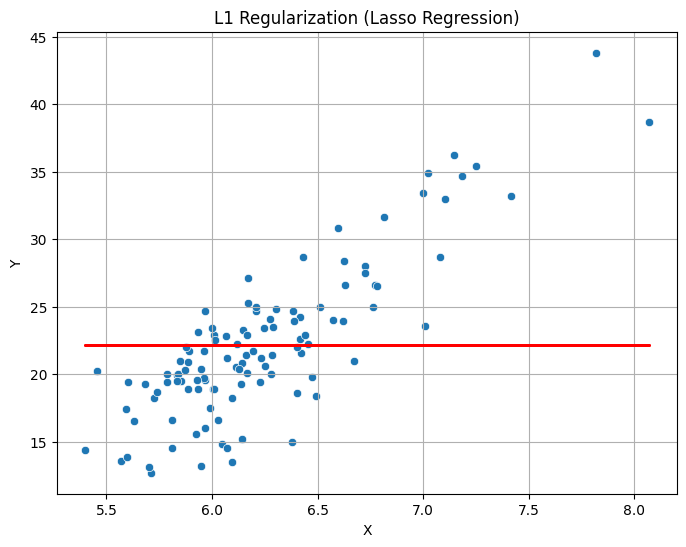

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

URL = "https://raw.githubusercontent.com/a-kir-a/Machine-learning/main/Dataset.csv"
df = pd.read_csv(URL, header=None)

x = df.loc[:110, 5].values.reshape(-1, 1)
y = df.loc[:110, 13].values

# Lasso Regression with L1 Regularization
alpha = 10
lasso = Lasso(alpha=alpha)
lasso.fit(x, y)
y_pred = lasso.predict(x)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x=x.flatten(), y=y)

# Lasso regression line
plt.plot(x.flatten(), y_pred, color="red", linewidth=2)

plt.title("L1 Regularization (Lasso Regression)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


L2 REGULARISATION

● L2 regularization/L2 norm combats overfitting by forcing weights to be small, but not making them exactly 0.

● Because the weights are non-zero, L2 regularisation produces a non-sparse
solution.

● One significant disadvantage of using L2 regularisation is that it is not resistant to outliers. The squared terms will magnify the outliers' error differences.


Mean Squared Error: 24.13901039207017


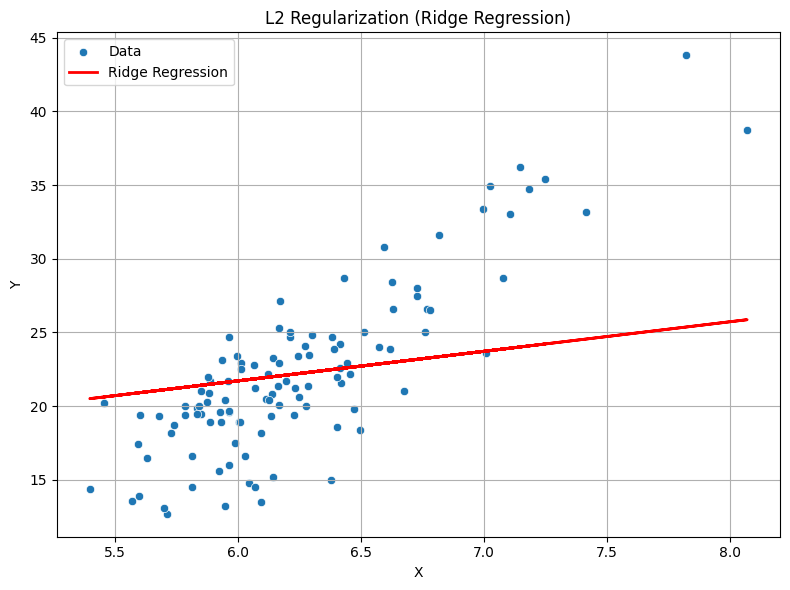

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

URL = "https://raw.githubusercontent.com/a-kir-a/Machine-learning/main/Dataset.csv"
df = pd.read_csv(URL, header=None)

x = df.loc[:110, 5].values.reshape(-1, 1)
y = df.loc[:110, 13].values

# Ridge Regression with L2 Regularization
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(x, y)
y_pred = ridge.predict(x)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x=x.flatten(), y=y, label="Data")

# Ridge regression line
plt.plot(x.flatten(), y_pred, color="red", linewidth=2, label="Ridge Regression")

plt.title("L2 Regularization (Ridge Regression)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


● L1 regularisation is more reliable than L2 regularisation for a simple reason. Outliers in the data become increasingly expensive because L2 regularisation uses the square of the weights. Because the absolute values of the weights are used for L1 regularisation, the cost only increases linearly.

● Regularization dramatically lowers the model's variance while maintaining or even increasing its bias. The influence on bias and variance is thus controlled by the tuning parameter. As the value increases, the coefficients' values decrease, lowering the variance.

● However, at a certain value, the model begins to lose crucial characteristics, leading to model bias and underfitting. Therefore, it is important to choose the value wisely

#QUESTION 5 - SOLUTION

In [ ]:
class Regression:
     def R1(self,X,Y,k,tau,lamda):
        self.Array1=np.ones(self.n)
        self.x=np.column_stack((self.Array1,self.X))
        self.beta=np.random.rand(self.m + 1)
        self.X=X
        self.Y=Y
        self.k=k
        self.tau=tau
        self.lamda=lamda

     def sigmoid(self,x):
        return 1/(1+ np.exp(-x))
     def entropy(self,y,Y):
        return -np.mean(Y*np.log(y)+ (1-y)* np.log(1-y))
     def calculate(self) :
        cost=0
        for i in range(self.k):
            y=self.sigmoid(np.dot(self.x,self.beta))
            gradient=np.dot(self.X.T, y-self.Y) / self.n
            self.beta= self.lamda*gradient
            cost=self.entropy(y,self.Y)
            if np.linalg.norm(gradient)< self.tau:
                break
        return self.beta, cost

class LinearRegression(Regression):
     def R1(self,X,Y,k,tau,lamda):
          super().R1(X,Y,tau,lamda)
class LogisticRegression(Regression):
     def R1(self,X,Y,k,tau,lamda):
          super().R1(X,Y,k,tau,lamda)

● The code defines two subclasses of the main class Regression, LinearRegression and LogisticRegression. Both subclasses inherit the main class's attributes and methods.

● The feature matrix X, the target vector Y, the number of iterations k, the tolerance value tau, and the regularisation parameter lambda are all attributes of the main class Regression.

● It also includes methods for calculating the sigmoid function and the entropy cost.